      ©Great Learning. Proprietary content. All Rights Reserved. Unauthorised use or distribution prohibited


### Q1.A

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cv2
import zipfile
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
with zipfile.ZipFile("plant-seedlings-classification.zip","r") as zip_ref:
    zip_ref.extractall('Unzipped')

In [ ]:
!ls

CNN - Project.pages                 Unzipped
CV-1.ipynb                          plant-seedlings-classification.zip
NN week 1 - Problem_Statement.pages upload


### Q1.B

In [ ]:
file_path = 'Unzipped/train'
df = pd.DataFrame(columns=[c])
for i in os.listdir(file_path):
    if i != '.DS_Store': #This if condition is machine specific - can be ignored 
        print(i)
        for j in os.listdir(os.path.join(file_path,i)):
            img = cv2.imread(os.path.join(file_path,i,j))
            df = df.append({'file_name':j,'species':i,'image':img},ignore_index=True)

Cleavers
Sugar beet
Common Chickweed
Loose Silky-bent
Scentless Mayweed
Shepherds Purse
Fat Hen
Common wheat
Black-grass
Small-flowered Cranesbill
Charlock
Maize


In [ ]:
df.shape

(4750, 3)

In [ ]:
df.sample()

,file_name,species,image
1309,fdb42d1ce.png,Loose Silky-bent,"[[[39, 57, 83], [39, 56, 82], [36, 53, 79], [4..."


In [ ]:
df.species.isna().sum()

0

In [ ]:
df.shape

(4750, 3)

### Q1.C

In [ ]:
def sample_img(df,n):
    df = df.sample(n)
    plt.figure(figsize=(20,20))
    for i,j in enumerate(df.iterrows()):
        plt.subplot(1,n,i+1)
        plt.imshow(j[1]['image'])
        plt.title("{}".format(j[1]['species']))    

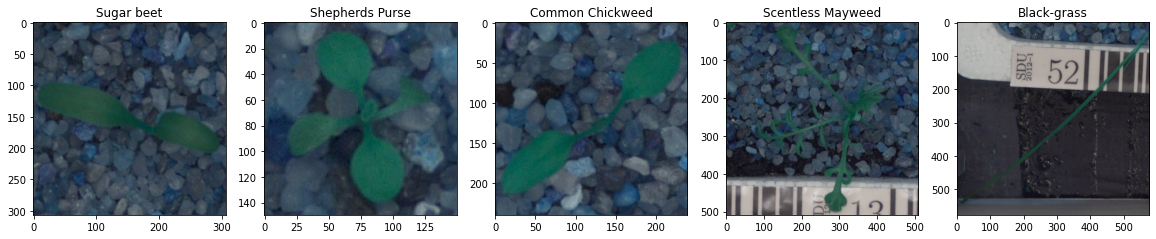

In [ ]:
sample_img(df,5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  4750 non-null   object
 1   species    4750 non-null   object
 2   image      4750 non-null   object
dtypes: object(3)
memory usage: 111.5+ KB


In [ ]:
type(df['image'][0])

numpy.ndarray

### Q2.A

In [ ]:
X = df['image']
Y = df['species']

### Q2.B

In [ ]:
Y = le.fit_transform(Y)
Y = to_categorical(Y)

### Q2.C

In [ ]:
X_new = np.zeros((X.shape[0],128,128,3))

In [ ]:
for i,j in enumerate(X):
    print(j.shape)
    k = np.resize(j,(128,128,3))
    print(k.shape)
    print('-'*9)
    X_new[i] = k

(531, 531, 3)
(128, 128, 3)
---------
(352, 352, 3)
(128, 128, 3)
---------
(373, 373, 3)
(128, 128, 3)
---------
(187, 187, 3)
(128, 128, 3)
---------
(210, 210, 3)
(128, 128, 3)
---------
(211, 211, 3)
(128, 128, 3)
---------
(109, 109, 3)
(128, 128, 3)
---------
(382, 382, 3)
(128, 128, 3)
---------
(313, 313, 3)
(128, 128, 3)
---------
(157, 157, 3)
(128, 128, 3)
---------
(242, 242, 3)
(128, 128, 3)
---------
(335, 335, 3)
(128, 128, 3)
---------
(521, 521, 3)
(128, 128, 3)
---------
(374, 374, 3)
(128, 128, 3)
---------
(123, 123, 3)
(128, 128, 3)
---------
(443, 443, 3)
(128, 128, 3)
---------
(165, 165, 3)
(128, 128, 3)
---------
(311, 311, 3)
(128, 128, 3)
---------
(145, 145, 3)
(128, 128, 3)
---------
(422, 422, 3)
(128, 128, 3)
---------
(488, 488, 3)
(128, 128, 3)
---------
(180, 180, 3)
(128, 128, 3)
---------
(110, 110, 3)
(128, 128, 3)
---------
(155, 155, 3)
(128, 128, 3)
---------
(466, 466, 3)
(128, 128, 3)
---------
(300, 300, 3)
(128, 128, 3)
---------
(144, 144, 3

(128, 128, 3)
---------
(190, 190, 3)
(128, 128, 3)
---------
(224, 224, 3)
(128, 128, 3)
---------
(225, 225, 3)
(128, 128, 3)
---------
(460, 460, 3)
(128, 128, 3)
---------
(176, 176, 3)
(128, 128, 3)
---------
(512, 512, 3)
(128, 128, 3)
---------
(470, 470, 3)
(128, 128, 3)
---------
(450, 450, 3)
(128, 128, 3)
---------
(618, 618, 3)
(128, 128, 3)
---------
(303, 303, 3)
(128, 128, 3)
---------
(928, 928, 3)
(128, 128, 3)
---------
(519, 519, 3)
(128, 128, 3)
---------
(374, 374, 3)
(128, 128, 3)
---------
(1228, 1228, 3)
(128, 128, 3)
---------
(438, 438, 3)
(128, 128, 3)
---------
(759, 759, 3)
(128, 128, 3)
---------
(643, 643, 3)
(128, 128, 3)
---------
(468, 468, 3)
(128, 128, 3)
---------
(169, 169, 3)
(128, 128, 3)
---------
(470, 470, 3)
(128, 128, 3)
---------
(606, 606, 3)
(128, 128, 3)
---------
(412, 412, 3)
(128, 128, 3)
---------
(1355, 1355, 3)
(128, 128, 3)
---------
(1433, 1433, 3)
(128, 128, 3)
---------
(716, 716, 3)
(128, 128, 3)
---------
(1195, 1195, 3)
(128

(128, 128, 3)
---------
(1005, 1005, 3)
(128, 128, 3)
---------
(464, 464, 3)
(128, 128, 3)
---------
(613, 613, 3)
(128, 128, 3)
---------
(566, 566, 3)
(128, 128, 3)
---------
(675, 675, 3)
(128, 128, 3)
---------
(553, 553, 3)
(128, 128, 3)
---------
(845, 845, 3)
(128, 128, 3)
---------
(1114, 1114, 3)
(128, 128, 3)
---------
(682, 682, 3)
(128, 128, 3)
---------
(631, 631, 3)
(128, 128, 3)
---------
(1023, 1023, 3)
(128, 128, 3)
---------
(386, 386, 3)
(128, 128, 3)
---------
(744, 744, 3)
(128, 128, 3)
---------
(333, 333, 3)
(128, 128, 3)
---------
(611, 611, 3)
(128, 128, 3)
---------
(314, 314, 3)
(128, 128, 3)
---------
(937, 999, 3)
(128, 128, 3)
---------
(567, 567, 3)
(128, 128, 3)
---------
(902, 902, 3)
(128, 128, 3)
---------
(1320, 1476, 3)
(128, 128, 3)
---------
(560, 560, 3)
(128, 128, 3)
---------
(341, 341, 3)
(128, 128, 3)
---------
(511, 511, 3)
(128, 128, 3)
---------
(86, 86, 3)
(128, 128, 3)
---------
(423, 423, 3)
(128, 128, 3)
---------
(768, 768, 3)
(128, 

(128, 128, 3)
---------
(397, 397, 3)
(128, 128, 3)
---------
(532, 532, 3)
(128, 128, 3)
---------
(91, 91, 3)
(128, 128, 3)
---------
(171, 171, 3)
(128, 128, 3)
---------
(424, 424, 3)
(128, 128, 3)
---------
(116, 116, 3)
(128, 128, 3)
---------
(398, 398, 3)
(128, 128, 3)
---------
(77, 77, 3)
(128, 128, 3)
---------
(91, 91, 3)
(128, 128, 3)
---------
(536, 536, 3)
(128, 128, 3)
---------
(199, 199, 3)
(128, 128, 3)
---------
(451, 451, 3)
(128, 128, 3)
---------
(409, 409, 3)
(128, 128, 3)
---------
(122, 122, 3)
(128, 128, 3)
---------
(622, 622, 3)
(128, 128, 3)
---------
(145, 145, 3)
(128, 128, 3)
---------
(412, 412, 3)
(128, 128, 3)
---------
(58, 58, 3)
(128, 128, 3)
---------
(180, 180, 3)
(128, 128, 3)
---------
(114, 114, 3)
(128, 128, 3)
---------
(278, 278, 3)
(128, 128, 3)
---------
(141, 141, 3)
(128, 128, 3)
---------
(410, 410, 3)
(128, 128, 3)
---------
(543, 543, 3)
(128, 128, 3)
---------
(167, 167, 3)
(128, 128, 3)
---------
(506, 506, 3)
(128, 128, 3)
------

(128, 128, 3)
---------
(110, 110, 3)
(128, 128, 3)
---------
(137, 137, 3)
(128, 128, 3)
---------
(88, 88, 3)
(128, 128, 3)
---------
(83, 83, 3)
(128, 128, 3)
---------
(250, 250, 3)
(128, 128, 3)
---------
(174, 174, 3)
(128, 128, 3)
---------
(75, 75, 3)
(128, 128, 3)
---------
(280, 280, 3)
(128, 128, 3)
---------
(364, 364, 3)
(128, 128, 3)
---------
(128, 128, 3)
(128, 128, 3)
---------
(101, 101, 3)
(128, 128, 3)
---------
(85, 85, 3)
(128, 128, 3)
---------
(139, 139, 3)
(128, 128, 3)
---------
(448, 448, 3)
(128, 128, 3)
---------
(67, 67, 3)
(128, 128, 3)
---------
(122, 122, 3)
(128, 128, 3)
---------
(106, 106, 3)
(128, 128, 3)
---------
(54, 54, 3)
(128, 128, 3)
---------
(122, 122, 3)
(128, 128, 3)
---------
(66, 66, 3)
(128, 128, 3)
---------
(148, 148, 3)
(128, 128, 3)
---------
(80, 80, 3)
(128, 128, 3)
---------
(100, 100, 3)
(128, 128, 3)
---------
(432, 432, 3)
(128, 128, 3)
---------
(135, 135, 3)
(128, 128, 3)
---------
(83, 83, 3)
(128, 128, 3)
---------
(385, 

(171, 171, 3)
(128, 128, 3)
---------
(88, 88, 3)
(128, 128, 3)
---------
(378, 378, 3)
(128, 128, 3)
---------
(151, 151, 3)
(128, 128, 3)
---------
(478, 478, 3)
(128, 128, 3)
---------
(516, 516, 3)
(128, 128, 3)
---------
(469, 469, 3)
(128, 128, 3)
---------
(94, 94, 3)
(128, 128, 3)
---------
(165, 165, 3)
(128, 128, 3)
---------
(454, 454, 3)
(128, 128, 3)
---------
(102, 102, 3)
(128, 128, 3)
---------
(121, 121, 3)
(128, 128, 3)
---------
(501, 501, 3)
(128, 128, 3)
---------
(489, 489, 3)
(128, 128, 3)
---------
(499, 499, 3)
(128, 128, 3)
---------
(90, 90, 3)
(128, 128, 3)
---------
(170, 170, 3)
(128, 128, 3)
---------
(403, 403, 3)
(128, 128, 3)
---------
(208, 208, 3)
(128, 128, 3)
---------
(227, 227, 3)
(128, 128, 3)
---------
(104, 104, 3)
(128, 128, 3)
---------
(376, 376, 3)
(128, 128, 3)
---------
(81, 81, 3)
(128, 128, 3)
---------
(144, 144, 3)
(128, 128, 3)
---------
(166, 166, 3)
(128, 128, 3)
---------
(567, 567, 3)
(128, 128, 3)
---------
(157, 157, 3)
(128, 

(178, 178, 3)
(128, 128, 3)
---------
(298, 298, 3)
(128, 128, 3)
---------
(604, 604, 3)
(128, 128, 3)
---------
(494, 494, 3)
(128, 128, 3)
---------
(692, 692, 3)
(128, 128, 3)
---------
(542, 542, 3)
(128, 128, 3)
---------
(155, 155, 3)
(128, 128, 3)
---------
(181, 181, 3)
(128, 128, 3)
---------
(361, 361, 3)
(128, 128, 3)
---------
(407, 407, 3)
(128, 128, 3)
---------
(193, 193, 3)
(128, 128, 3)
---------
(178, 178, 3)
(128, 128, 3)
---------
(143, 143, 3)
(128, 128, 3)
---------
(395, 395, 3)
(128, 128, 3)
---------
(161, 161, 3)
(128, 128, 3)
---------
(126, 126, 3)
(128, 128, 3)
---------
(410, 410, 3)
(128, 128, 3)
---------
(395, 395, 3)
(128, 128, 3)
---------
(618, 618, 3)
(128, 128, 3)
---------
(571, 571, 3)
(128, 128, 3)
---------
(187, 187, 3)
(128, 128, 3)
---------
(1382, 1382, 3)
(128, 128, 3)
---------
(385, 385, 3)
(128, 128, 3)
---------
(133, 133, 3)
(128, 128, 3)
---------
(571, 571, 3)
(128, 128, 3)
---------
(162, 162, 3)
(128, 128, 3)
---------
(528, 528,

(128, 128, 3)
---------
(197, 197, 3)
(128, 128, 3)
---------
(153, 153, 3)
(128, 128, 3)
---------
(568, 568, 3)
(128, 128, 3)
---------
(1190, 1190, 3)
(128, 128, 3)
---------
(170, 170, 3)
(128, 128, 3)
---------
(1048, 1048, 3)
(128, 128, 3)
---------
(418, 418, 3)
(128, 128, 3)
---------
(105, 105, 3)
(128, 128, 3)
---------
(99, 99, 3)
(128, 128, 3)
---------
(87, 87, 3)
(128, 128, 3)
---------
(631, 631, 3)
(128, 128, 3)
---------
(126, 126, 3)
(128, 128, 3)
---------
(119, 119, 3)
(128, 128, 3)
---------
(541, 541, 3)
(128, 128, 3)
---------
(137, 137, 3)
(128, 128, 3)
---------
(114, 114, 3)
(128, 128, 3)
---------
(112, 112, 3)
(128, 128, 3)
---------
(484, 484, 3)
(128, 128, 3)
---------
(854, 854, 3)
(128, 128, 3)
---------
(267, 267, 3)
(128, 128, 3)
---------
(731, 731, 3)
(128, 128, 3)
---------
(143, 143, 3)
(128, 128, 3)
---------
(560, 560, 3)
(128, 128, 3)
---------
(647, 647, 3)
(128, 128, 3)
---------
(363, 363, 3)
(128, 128, 3)
---------
(671, 633, 3)
(128, 128, 3

(128, 128, 3)
---------
(167, 167, 3)
(128, 128, 3)
---------
(153, 153, 3)
(128, 128, 3)
---------
(174, 174, 3)
(128, 128, 3)
---------
(165, 165, 3)
(128, 128, 3)
---------
(156, 156, 3)
(128, 128, 3)
---------
(1101, 1206, 3)
(128, 128, 3)
---------
(577, 577, 3)
(128, 128, 3)
---------
(106, 106, 3)
(128, 128, 3)
---------
(101, 101, 3)
(128, 128, 3)
---------
(104, 104, 3)
(128, 128, 3)
---------
(165, 165, 3)
(128, 128, 3)
---------
(77, 77, 3)
(128, 128, 3)
---------
(120, 120, 3)
(128, 128, 3)
---------
(137, 137, 3)
(128, 128, 3)
---------
(95, 95, 3)
(128, 128, 3)
---------
(57, 57, 3)
(128, 128, 3)
---------
(175, 175, 3)
(128, 128, 3)
---------
(200, 200, 3)
(128, 128, 3)
---------
(514, 514, 3)
(128, 128, 3)
---------
(137, 137, 3)
(128, 128, 3)
---------
(417, 417, 3)
(128, 128, 3)
---------
(136, 136, 3)
(128, 128, 3)
---------
(383, 383, 3)
(128, 128, 3)
---------
(62, 62, 3)
(128, 128, 3)
---------
(607, 607, 3)
(128, 128, 3)
---------
(71, 71, 3)
(128, 128, 3)
------

(128, 128, 3)
---------
(390, 390, 3)
(128, 128, 3)
---------
(93, 93, 3)
(128, 128, 3)
---------
(86, 86, 3)
(128, 128, 3)
---------
(602, 602, 3)
(128, 128, 3)
---------
(538, 538, 3)
(128, 128, 3)
---------
(99, 99, 3)
(128, 128, 3)
---------
(138, 138, 3)
(128, 128, 3)
---------
(75, 75, 3)
(128, 128, 3)
---------
(691, 691, 3)
(128, 128, 3)
---------
(66, 66, 3)
(128, 128, 3)
---------
(104, 104, 3)
(128, 128, 3)
---------
(121, 121, 3)
(128, 128, 3)
---------
(61, 61, 3)
(128, 128, 3)
---------
(141, 141, 3)
(128, 128, 3)
---------
(81, 81, 3)
(128, 128, 3)
---------
(114, 114, 3)
(128, 128, 3)
---------
(119, 119, 3)
(128, 128, 3)
---------
(417, 417, 3)
(128, 128, 3)
---------
(485, 485, 3)
(128, 128, 3)
---------
(384, 384, 3)
(128, 128, 3)
---------
(71, 71, 3)
(128, 128, 3)
---------
(756, 756, 3)
(128, 128, 3)
---------
(80, 80, 3)
(128, 128, 3)
---------
(521, 521, 3)
(128, 128, 3)
---------
(129, 129, 3)
(128, 128, 3)
---------
(370, 370, 3)
(128, 128, 3)
---------
(689, 

(128, 128, 3)
---------
(102, 102, 3)
(128, 128, 3)
---------
(925, 925, 3)
(128, 128, 3)
---------
(133, 133, 3)
(128, 128, 3)
---------
(370, 370, 3)
(128, 128, 3)
---------
(189, 189, 3)
(128, 128, 3)
---------
(173, 173, 3)
(128, 128, 3)
---------
(110, 110, 3)
(128, 128, 3)
---------
(107, 107, 3)
(128, 128, 3)
---------
(682, 682, 3)
(128, 128, 3)
---------
(191, 191, 3)
(128, 128, 3)
---------
(254, 254, 3)
(128, 128, 3)
---------
(758, 758, 3)
(128, 128, 3)
---------
(81, 81, 3)
(128, 128, 3)
---------
(224, 224, 3)
(128, 128, 3)
---------
(151, 151, 3)
(128, 128, 3)
---------
(174, 174, 3)
(128, 128, 3)
---------
(266, 266, 3)
(128, 128, 3)
---------
(440, 440, 3)
(128, 128, 3)
---------
(1083, 1083, 3)
(128, 128, 3)
---------
(435, 435, 3)
(128, 128, 3)
---------
(155, 155, 3)
(128, 128, 3)
---------
(126, 126, 3)
(128, 128, 3)
---------
(226, 226, 3)
(128, 128, 3)
---------
(80, 80, 3)
(128, 128, 3)
---------
(157, 157, 3)
(128, 128, 3)
---------
(525, 525, 3)
(128, 128, 3)


(140, 140, 3)
(128, 128, 3)
---------
(100, 100, 3)
(128, 128, 3)
---------
(229, 229, 3)
(128, 128, 3)
---------
(549, 549, 3)
(128, 128, 3)
---------
(107, 107, 3)
(128, 128, 3)
---------
(147, 147, 3)
(128, 128, 3)
---------
(193, 193, 3)
(128, 128, 3)
---------
(259, 259, 3)
(128, 128, 3)
---------
(124, 124, 3)
(128, 128, 3)
---------
(131, 131, 3)
(128, 128, 3)
---------
(132, 132, 3)
(128, 128, 3)
---------
(181, 181, 3)
(128, 128, 3)
---------
(154, 154, 3)
(128, 128, 3)
---------
(829, 829, 3)
(128, 128, 3)
---------
(194, 194, 3)
(128, 128, 3)
---------
(455, 455, 3)
(128, 128, 3)
---------
(459, 459, 3)
(128, 128, 3)
---------
(321, 321, 3)
(128, 128, 3)
---------
(195, 195, 3)
(128, 128, 3)
---------
(641, 641, 3)
(128, 128, 3)
---------
(57, 57, 3)
(128, 128, 3)
---------
(429, 429, 3)
(128, 128, 3)
---------
(147, 147, 3)
(128, 128, 3)
---------
(163, 163, 3)
(128, 128, 3)
---------
(156, 156, 3)
(128, 128, 3)
---------
(166, 166, 3)
(128, 128, 3)
---------
(178, 178, 3)


(128, 128, 3)
---------
(194, 194, 3)
(128, 128, 3)
---------
(668, 668, 3)
(128, 128, 3)
---------
(181, 181, 3)
(128, 128, 3)
---------
(681, 681, 3)
(128, 128, 3)
---------
(60, 60, 3)
(128, 128, 3)
---------
(676, 676, 3)
(128, 128, 3)
---------
(64, 64, 3)
(128, 128, 3)
---------
(167, 167, 3)
(128, 128, 3)
---------
(133, 133, 3)
(128, 128, 3)
---------
(786, 786, 3)
(128, 128, 3)
---------
(555, 555, 3)
(128, 128, 3)
---------
(181, 181, 3)
(128, 128, 3)
---------
(189, 189, 3)
(128, 128, 3)
---------
(582, 582, 3)
(128, 128, 3)
---------
(453, 453, 3)
(128, 128, 3)
---------
(77, 77, 3)
(128, 128, 3)
---------
(197, 197, 3)
(128, 128, 3)
---------
(435, 435, 3)
(128, 128, 3)
---------
(106, 106, 3)
(128, 128, 3)
---------
(800, 800, 3)
(128, 128, 3)
---------
(431, 431, 3)
(128, 128, 3)
---------
(83, 83, 3)
(128, 128, 3)
---------
(1268, 1268, 3)
(128, 128, 3)
---------
(739, 739, 3)
(128, 128, 3)
---------
(105, 105, 3)
(128, 128, 3)
---------
(1000, 1000, 3)
(128, 128, 3)
--

(128, 128, 3)
---------
(879, 879, 3)
(128, 128, 3)
---------
(625, 625, 3)
(128, 128, 3)
---------
(430, 430, 3)
(128, 128, 3)
---------
(351, 351, 3)
(128, 128, 3)
---------
(121, 121, 3)
(128, 128, 3)
---------
(2192, 2835, 3)
(128, 128, 3)
---------
(402, 402, 3)
(128, 128, 3)
---------
(388, 388, 3)
(128, 128, 3)
---------
(163, 163, 3)
(128, 128, 3)
---------
(685, 685, 3)
(128, 128, 3)
---------
(193, 193, 3)
(128, 128, 3)
---------
(780, 780, 3)
(128, 128, 3)
---------
(1005, 1006, 3)
(128, 128, 3)
---------
(780, 780, 3)
(128, 128, 3)
---------
(1209, 1209, 3)
(128, 128, 3)
---------
(435, 435, 3)
(128, 128, 3)
---------
(94, 94, 3)
(128, 128, 3)
---------
(1620, 1620, 3)
(128, 128, 3)
---------
(182, 182, 3)
(128, 128, 3)
---------
(1122, 1122, 3)
(128, 128, 3)
---------
(641, 641, 3)
(128, 128, 3)
---------
(740, 740, 3)
(128, 128, 3)
---------
(181, 181, 3)
(128, 128, 3)
---------
(1074, 1074, 3)
(128, 128, 3)
---------
(74, 74, 3)
(128, 128, 3)
---------
(1374, 1448, 3)
(1

(128, 128, 3)
---------
(625, 625, 3)
(128, 128, 3)
---------
(632, 632, 3)
(128, 128, 3)
---------
(400, 400, 3)
(128, 128, 3)
---------
(248, 248, 3)
(128, 128, 3)
---------
(220, 220, 3)
(128, 128, 3)
---------
(312, 312, 3)
(128, 128, 3)
---------
(536, 536, 3)
(128, 128, 3)
---------
(539, 539, 3)
(128, 128, 3)
---------
(513, 513, 3)
(128, 128, 3)
---------
(251, 251, 3)
(128, 128, 3)
---------
(245, 245, 3)
(128, 128, 3)
---------
(470, 470, 3)
(128, 128, 3)
---------
(402, 402, 3)
(128, 128, 3)
---------
(209, 209, 3)
(128, 128, 3)
---------
(334, 334, 3)
(128, 128, 3)
---------
(140, 140, 3)
(128, 128, 3)
---------
(314, 314, 3)
(128, 128, 3)
---------
(368, 368, 3)
(128, 128, 3)
---------
(677, 677, 3)
(128, 128, 3)
---------
(183, 183, 3)
(128, 128, 3)
---------
(359, 359, 3)
(128, 128, 3)
---------
(531, 531, 3)
(128, 128, 3)
---------
(602, 602, 3)
(128, 128, 3)
---------
(303, 303, 3)
(128, 128, 3)
---------
(576, 576, 3)
(128, 128, 3)
---------
(434, 434, 3)
(128, 128, 3

(385, 385, 3)
(128, 128, 3)
---------
(209, 209, 3)
(128, 128, 3)
---------
(389, 389, 3)
(128, 128, 3)
---------
(319, 319, 3)
(128, 128, 3)
---------
(610, 610, 3)
(128, 128, 3)
---------
(374, 374, 3)
(128, 128, 3)
---------
(130, 130, 3)
(128, 128, 3)
---------
(577, 577, 3)
(128, 128, 3)
---------
(292, 292, 3)
(128, 128, 3)
---------
(135, 135, 3)
(128, 128, 3)
---------
(373, 373, 3)
(128, 128, 3)
---------
(157, 157, 3)
(128, 128, 3)
---------
(187, 187, 3)
(128, 128, 3)
---------
(173, 173, 3)
(128, 128, 3)
---------
(272, 272, 3)
(128, 128, 3)
---------
(350, 350, 3)
(128, 128, 3)
---------
(647, 647, 3)
(128, 128, 3)
---------
(418, 418, 3)
(128, 128, 3)
---------
(376, 376, 3)
(128, 128, 3)
---------
(959, 959, 3)
(128, 128, 3)
---------
(733, 733, 3)
(128, 128, 3)
---------
(400, 400, 3)
(128, 128, 3)
---------
(275, 275, 3)
(128, 128, 3)
---------
(134, 134, 3)
(128, 128, 3)
---------
(239, 239, 3)
(128, 128, 3)
---------
(119, 119, 3)
(128, 128, 3)
---------
(395, 395, 3

(128, 128, 3)
---------
(286, 286, 3)
(128, 128, 3)
---------
(210, 210, 3)
(128, 128, 3)
---------
(166, 166, 3)
(128, 128, 3)
---------
(377, 377, 3)
(128, 128, 3)
---------
(425, 425, 3)
(128, 128, 3)
---------
(238, 238, 3)
(128, 128, 3)
---------
(152, 152, 3)
(128, 128, 3)
---------
(831, 831, 3)
(128, 128, 3)
---------
(181, 181, 3)
(128, 128, 3)
---------
(397, 397, 3)
(128, 128, 3)
---------
(768, 768, 3)
(128, 128, 3)
---------
(311, 311, 3)
(128, 128, 3)
---------
(159, 159, 3)
(128, 128, 3)
---------
(1022, 1022, 3)
(128, 128, 3)
---------
(406, 406, 3)
(128, 128, 3)
---------
(345, 345, 3)
(128, 128, 3)
---------
(168, 168, 3)
(128, 128, 3)
---------
(350, 350, 3)
(128, 128, 3)
---------
(874, 874, 3)
(128, 128, 3)
---------
(380, 380, 3)
(128, 128, 3)
---------
(1037, 1037, 3)
(128, 128, 3)
---------
(424, 424, 3)
(128, 128, 3)
---------
(379, 379, 3)
(128, 128, 3)
---------
(169, 169, 3)
(128, 128, 3)
---------
(524, 524, 3)
(128, 128, 3)
---------
(1135, 1135, 3)
(128, 

(514, 514, 3)
(128, 128, 3)
---------
(172, 172, 3)
(128, 128, 3)
---------
(145, 145, 3)
(128, 128, 3)
---------
(1083, 1083, 3)
(128, 128, 3)
---------
(84, 84, 3)
(128, 128, 3)
---------
(182, 182, 3)
(128, 128, 3)
---------
(155, 155, 3)
(128, 128, 3)
---------
(593, 593, 3)
(128, 128, 3)
---------
(178, 178, 3)
(128, 128, 3)
---------
(83, 83, 3)
(128, 128, 3)
---------
(82, 82, 3)
(128, 128, 3)
---------
(118, 118, 3)
(128, 128, 3)
---------
(415, 415, 3)
(128, 128, 3)
---------
(446, 446, 3)
(128, 128, 3)
---------
(130, 130, 3)
(128, 128, 3)
---------
(958, 958, 3)
(128, 128, 3)
---------
(89, 89, 3)
(128, 128, 3)
---------
(686, 686, 3)
(128, 128, 3)
---------
(54, 54, 3)
(128, 128, 3)
---------
(448, 448, 3)
(128, 128, 3)
---------
(59, 59, 3)
(128, 128, 3)
---------
(534, 534, 3)
(128, 128, 3)
---------
(1020, 1020, 3)
(128, 128, 3)
---------
(74, 74, 3)
(128, 128, 3)
---------
(71, 71, 3)
(128, 128, 3)
---------
(1588, 1588, 3)
(128, 128, 3)
---------
(145, 145, 3)
(128, 12

### Q2.D

In [ ]:
X_new = X_new/255

In [ ]:
X_new.dtype

dtype('float64')

In [ ]:
X_new.shape

(4750, 128, 128, 3)

### Q3.A

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_new,Y,random_state=77,test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(3800, 128, 128, 3)
(950, 128, 128, 3)
(3800, 12)
(950, 12)


### Q3.B

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# model architecture building
model = Sequential()

# model.add(BatchNormalization(input_shape = (128, 128, 3)))

model.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (128, 128, 3))) 
model.add(MaxPooling2D(pool_size = 2))

model.add(Convolution2D(filters = 64, kernel_size = 4, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(BatchNormalization())

model.add(Convolution2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Convolution2D(filters = 128, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten()) 

# fully connected layer
model.add(Dense(units = 128,activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))

model.add(Dense(units = 12, activation = 'softmax')) 

2021-10-08 11:30:35.363696: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Q3.C

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0

/Users/shashankshirude/venv/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test),batch_size=128)


2021-10-08 11:30:43.027230: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
30/30 [==============================] - 99s 3s/step - loss: 2.3430 - accuracy: 0.1974 - val_loss: 2.4483 - val_accuracy: 0.2295
Epoch 2/20
30/30 [==============================] - 85s 3s/step - loss: 2.0753 - accuracy: 0.2987 - val_loss: 2.4382 - val_accuracy: 0.2242
Epoch 3/20
30/30 [==============================] - 87s 3s/step - loss: 1.9442 - accuracy: 0.3442 - val_loss: 2.4373 - val_accuracy: 0.2337
Epoch 4/20
30/30 [==============================] - 78s 3s/step - loss: 1.8371 - accuracy: 0.3784 - val_loss: 2.4313 - val_accuracy: 0.1937
Epoch 5/20
30/30 [==============================] - 74s 2s/step - loss: 1.7529 - accuracy: 0.4087 - val_loss: 2.3590 - val_accuracy: 0.2284
Epoch 6/20
30/30 [==============================] - 74s 2s/step - loss: 1.6806 - accuracy: 0.4282 - val_loss: 2.3518 - val_accuracy: 0.2337
Epoch 7/20
30/30 [==============================] - 75s 3s/step - loss: 1.6809 - accuracy: 0.4287 - val_loss: 2.2615 - val_accuracy: 0.3863
Epoch 8/20
30/30 [==

### Q3.D

In [ ]:
tst_data = df.sample()
tst_img = tst_data['image'].item()
act_label = tst_data['species'].item()

tst_img = np.expand_dims(tst_img,0)
tst_img = np.resize(tst_img,(1,128,128,3))
tst_img.shape

model.predict(tst_img)

np.argmax(model.predict(tst_img))

print('Predicted Label is: {}'.format(le.inverse_transform([np.argmax(model.predict(tst_img))])[0]))
print('Actual Label is: {}'.format(act_label))

Predicted Label is: Common Chickweed
Actual Label is: Common wheat


      ©Great Learning. Proprietary content. All Rights Reserved. Unauthorised use or distribution prohibited
